In [1]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
from tensorflow import keras

In [2]:
x_train=[];y_train=[]
import os
x = os.path.join(os.getcwd(), "test")
train=os.listdir(x)
for i in train:
    for j in os.listdir(os.path.join(x,i)):
        img1=Image.open(os.path.join(x,i,j))
        img1=img1.convert("RGB")
        x_train.append(np.array(img1))
        if i=="angry":
            y_train.append(0)
        if i=="disgust":
            y_train.append(1)
        if i=="fear":
            y_train.append(2)
        if i=="happy":
            y_train.append(3)
        if i=="neutral":
            y_train.append(4)
        if i=="sad":
            y_train.append(5)
        if i=="surprise":
            y_train.append(6)

In [3]:
print(x_train)
x_train=np.array(x_train)
y_train=np.array(y_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
print(x_train.shape,y_train.shape,sep='\n')

(7725, 48, 48, 3)
(7725,)


In [5]:
x_test=[];y_test=[]
x = os.path.join(os.getcwd(), "test")
#/kaggle/input/fer2013/train/angry/Training_10118481.jpg
test=os.listdir(x)
for i in test:
    for j in os.listdir(os.path.join(x,i)):
        img1=Image.open(os.path.join(x,i,j))
        img1=img1.convert("RGB")
        x_test.append(np.array(img1))
        if i=="angry":
            y_test.append(0)
        if i=="disgust":
            y_test.append(1)
        if i=="fear":
            y_test.append(2)
        if i=="happy":
            y_test.append(3)
        if i=="neutral":
            y_test.append(4)
        if i=="sad":
            y_test.append(5)
        if i=="surprise":
            y_test.append(6)

In [6]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [7]:
print(x_test.shape,y_test.shape,sep='\n')

(7725, 48, 48, 3)
(7725,)


In [8]:
shuffle_indexes = np.arange(x_train.shape[0])
np.random.shuffle(shuffle_indexes)
x_train = x_train[shuffle_indexes]
y_train = y_train[shuffle_indexes]

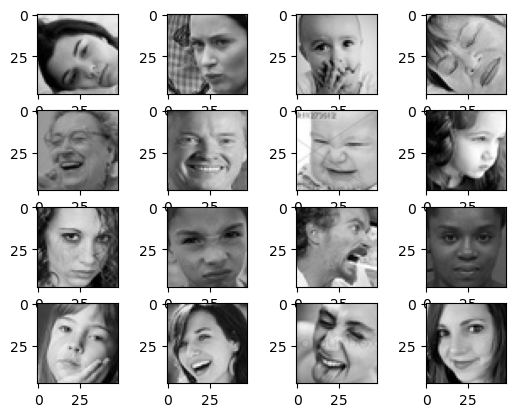

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])

In [10]:
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential

In [11]:
model=Sequential()

model.add(Conv2D(16,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(7,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                     

In [13]:
opt=keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [14]:
es=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode="max",verbose=1,patience=20)
mcp=keras.callbacks.ModelCheckpoint('model.h5',moniter='val_accuracy',verbose=1,mode='max',save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es,mcp])

Epoch 1/100


97/97 [==============================] - ETA: 0s - loss: 3.1843 - accuracy: 0.2008
Epoch 1: val_loss improved from -inf to 89.06017, saving model to model.h5
97/97 [==============================] - 12s 105ms/step - loss: 3.1843 - accuracy: 0.2008 - val_loss: 89.0602 - val_accuracy: 0.1508
Epoch 2/100
 1/97 [..............................] - ETA: 9s - loss: 3.2454 - accuracy: 0.2031

C:\Users\Darryl Hilmy\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/97 [==============================] - ETA: 0s - loss: 2.9796 - accuracy: 0.1960
Epoch 2: val_loss did not improve from 89.06017
97/97 [==============================] - 10s 103ms/step - loss: 2.9796 - accuracy: 0.1960 - val_loss: 24.1252 - val_accuracy: 0.1359
Epoch 3/100
97/97 [==============================] - ETA: 0s - loss: 1.9383 - accuracy: 0.2201
Epoch 3: val_loss did not improve from 89.06017
97/97 [==============================] - 10s 98ms/step - loss: 1.9383 - accuracy: 0.2201 - val_loss: 2.0118 - val_accuracy: 0.1929
Epoch 4/100
97/97 [==============================] - ETA: 0s - loss: 1.8680 - accuracy: 0.2542
Epoch 4: val_loss did not improve from 89.06017
97/97 [==============================] - 10s 103ms/step - loss: 1.8680 - accuracy: 0.2542 - val_loss: 3.4827 - val_accuracy: 0.1631
Epoch 5/100
97/97 [==============================] - ETA: 0s - loss: 1.8349 - accuracy: 0.2720
Epoch 5: val_loss did not improve from 89.06017
97/97 [==============================] - 10s

Epoch 32/100
97/97 [==============================] - ETA: 0s - loss: 1.2757 - accuracy: 0.5307
Epoch 32: val_loss did not improve from 89.06017
97/97 [==============================] - 11s 113ms/step - loss: 1.2757 - accuracy: 0.5307 - val_loss: 1.5848 - val_accuracy: 0.4149
Epoch 33/100
97/97 [==============================] - ETA: 0s - loss: 1.2762 - accuracy: 0.5283
Epoch 33: val_loss did not improve from 89.06017
97/97 [==============================] - 11s 111ms/step - loss: 1.2762 - accuracy: 0.5283 - val_loss: 1.6950 - val_accuracy: 0.3832
Epoch 34/100
97/97 [==============================] - ETA: 0s - loss: 1.2611 - accuracy: 0.5235
Epoch 34: val_loss did not improve from 89.06017
97/97 [==============================] - 10s 108ms/step - loss: 1.2611 - accuracy: 0.5235 - val_loss: 1.5780 - val_accuracy: 0.4123
Epoch 35/100
96/97 [============================>.] - ETA: 0s - loss: 1.2297 - accuracy: 0.5457
Epoch 35: val_loss did not improve from 89.06017
97/97 [=================

Epoch 62/100
97/97 [==============================] - ETA: 0s - loss: 0.7803 - accuracy: 0.7083
Epoch 62: val_loss did not improve from 89.06017
97/97 [==============================] - 12s 128ms/step - loss: 0.7803 - accuracy: 0.7083 - val_loss: 1.7169 - val_accuracy: 0.4401
Epoch 63/100
97/97 [==============================] - ETA: 0s - loss: 0.7583 - accuracy: 0.7175
Epoch 63: val_loss did not improve from 89.06017
97/97 [==============================] - 11s 109ms/step - loss: 0.7583 - accuracy: 0.7175 - val_loss: 1.7813 - val_accuracy: 0.4220
Epoch 64/100
97/97 [==============================] - ETA: 0s - loss: 0.7641 - accuracy: 0.7105
Epoch 64: val_loss did not improve from 89.06017
97/97 [==============================] - 11s 109ms/step - loss: 0.7641 - accuracy: 0.7105 - val_loss: 1.8016 - val_accuracy: 0.4421
Epoch 65/100
97/97 [==============================] - ETA: 0s - loss: 0.7555 - accuracy: 0.7241
Epoch 65: val_loss did not improve from 89.06017
97/97 [=================

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

242/242 [==============================] - 3s 13ms/step - loss: 0.8722 - accuracy: 0.7128
0.8722022175788879
0.7127507925033569


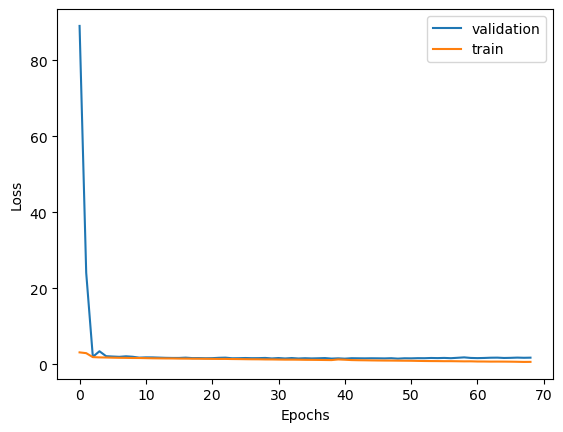

In [16]:
plt.plot(hist.history['val_loss'],label='validation')
plt.plot(hist.history['loss'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

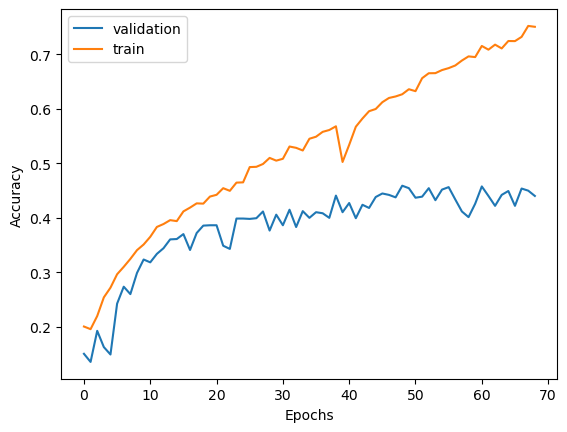

In [17]:
plt.plot(hist.history['val_accuracy'],label='validation')
plt.plot(hist.history['accuracy'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [18]:
from keras.applications.vgg16 import VGG16,preprocess_input

In [19]:
x1_train=[preprocess_input(img1) for img1 in x_train]

In [20]:
x1_train=np.array(x1_train)

In [21]:
x1_train.shape

(7725, 48, 48, 3)

In [22]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model.summary()

58889256/58889256 [==============================] - 10s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [23]:
feature_train=base_model.predict(x1_train,batch_size=64)

121/121 [==============================] - 28s 228ms/step


In [24]:
feature_train.shape

(7725, 1, 1, 512)

In [25]:
feature_test=base_model.predict(x_test,batch_size=64)

121/121 [==============================] - 29s 235ms/step


In [26]:
feature_train=feature_train.reshape(feature_train.shape[0], -1)

In [27]:
feature_train.shape

(7725, 512)

In [28]:
feature_test=feature_test.reshape(feature_test.shape[0], -1)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm

In [30]:
train_10000=feature_train[:10000]
y_train_10000=y_train[:10000]

In [31]:
train_10000.shape

(7725, 512)

In [32]:
clf = svm.SVC()

clf.fit(train_10000 ,y_train_10000)

# Make predictions on the test set
predictions = clf.predict(feature_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 42.25%


In [33]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

RF_model.fit(feature_train, y_train)

predictions = RF_model.predict(feature_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 45.27%


ValueError: too many values to unpack (expected 4)

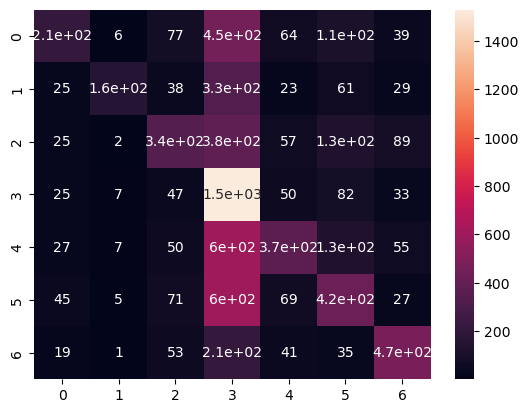

In [34]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

tp = cm.ravel()
tp = fp
fp = fn
fn = tn

recall = tp/(tp+fn)
precision = tp/(tp+fp)

print('Accuracy =', metrics.accuracy_score(y_test, prediction_RF))
print("Recall =", recall)
print("Precision =", precision)

In [35]:
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [36]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [37]:
for layer in base_model.layers:
    layer.trainable=False

In [38]:
x=base_model.layers[-1].output
x=Flatten()(x)
x=Dense(7,activation='softmax')(x)

model=Model(base_model.input,x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [39]:
opt=keras.optimizers.Adam()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es1=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=20,restore_best_weights=True)
hist=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es1])

Epoch 1/100
97/97 [==============================] - 28s 288ms/step - loss: 13.8785 - accuracy: 0.1888 - val_loss: 8.8205 - val_accuracy: 0.2304
Epoch 2/100
97/97 [==============================] - 30s 312ms/step - loss: 7.1034 - accuracy: 0.2584 - val_loss: 6.1996 - val_accuracy: 0.2673
Epoch 3/100
97/97 [==============================] - 32s 327ms/step - loss: 4.8855 - accuracy: 0.2934 - val_loss: 4.9332 - val_accuracy: 0.2777
Epoch 4/100
97/97 [==============================] - 30s 314ms/step - loss: 3.6589 - accuracy: 0.3152 - val_loss: 4.0365 - val_accuracy: 0.2867
Epoch 5/100
97/97 [==============================] - 31s 321ms/step - loss: 2.8713 - accuracy: 0.3482 - val_loss: 3.4352 - val_accuracy: 0.3003
Epoch 6/100
97/97 [==============================] - 29s 304ms/step - loss: 2.3744 - accuracy: 0.3770 - val_loss: 3.0595 - val_accuracy: 0.3159
Epoch 7/100
97/97 [==============================] - 30s 309ms/step - loss: 2.0957 - accuracy: 0.3861 - val_loss: 2.8574 - val_accuracy

In [ ]:
plt.plot(hist.history['val_loss'],label="validation")
plt.plot(hist.history['loss'],label='train')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(hist.history['val_accuracy'],label="validation")
plt.plot(hist.history['accuracy'],label='train')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()

In [ ]:
base_model1=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model1.summary()

In [ ]:
for i in range(15):
    base_model1.layers[i].trainable=False

In [ ]:
y=base_model1.layers[-1].output
y=Flatten()(y)
y=Dense(7,activation='softmax')(y)
    
model1=Model(inputs=base_model1.input,outputs=y)
model1.summary()

In [ ]:
opt=keras.optimizers.Adam(learning_rate=0.05)
model1.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es2=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=20,restore_best_weights=True)
hist1=model1.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es2])

In [ ]:
plt.plot(hist1.history['val_loss'],label="validation")
plt.plot(hist1.history['loss'],label='train')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(hist1.history['val_accuracy'],label="validation")
plt.plot(hist1.history['accuracy'],label='train')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()

In [ ]:
base_model2=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model2.summary()